In [12]:
import pickle

In [13]:
X = pickle.load(open('X.pkl', 'rb'))
y = pickle.load(open('y.pkl', 'rb'))

In [14]:
X =X/255

In [15]:
X = X.reshape(-1, 60, 60, 1)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,Dropout

In [30]:
model = Sequential()

#First Convolution layer with max pooling 
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

#Second Convolution layer with max pooling 
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

#Third Convolution layer with max pooling 
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

# Flatten the results to feed into a DNN
model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(128, input_shape = X.shape[1:], activation = 'relu'))

model.add(Dense(2, activation = 'softmax'))

In [31]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
history = model.fit(X, y, epochs=5, validation_split=0.1) 

Epoch 1/5
181/181 [==============================] - 31s 164ms/step - loss: 0.4454 - accuracy: 0.8321 - val_loss: 0.4293 - val_accuracy: 0.8287
Epoch 2/5
181/181 [==============================] - 29s 162ms/step - loss: 0.3599 - accuracy: 0.8465 - val_loss: 0.3700 - val_accuracy: 0.8364
Epoch 3/5
181/181 [==============================] - 29s 162ms/step - loss: 0.3071 - accuracy: 0.8704 - val_loss: 0.3661 - val_accuracy: 0.8489
Epoch 4/5
181/181 [==============================] - 30s 163ms/step - loss: 0.2763 - accuracy: 0.8831 - val_loss: 0.2842 - val_accuracy: 0.8863
Epoch 5/5
181/181 [==============================] - 29s 163ms/step - loss: 0.2427 - accuracy: 0.8985 - val_loss: 0.2991 - val_accuracy: 0.8785


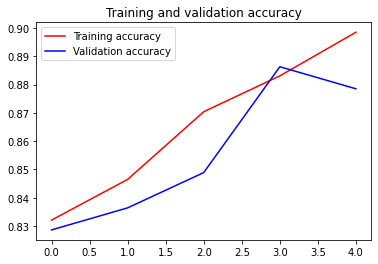

<Figure size 432x288 with 0 Axes>

In [33]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()